In [91]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style='ticks')

In [92]:
fileloc=r'C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 680 Applied DS\Week2\xAPI-Edu-Data.csv'

In [93]:
data=pd.read_csv(fileloc)

In [94]:
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [95]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [96]:
melt = pd.melt(data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView'])

Text(0.5, 1.0, 'High, middle and low level students')

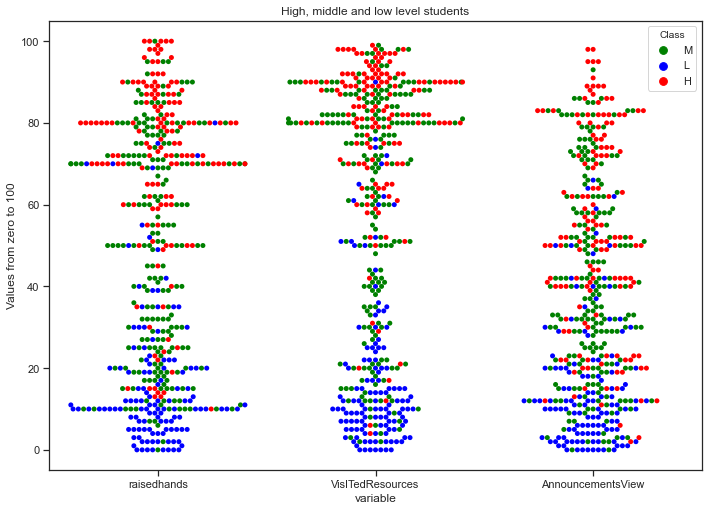

In [97]:
sns.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette={'H':'red','M':'green','L':'blue'})
plt.ylabel('Values from zero to 100')
plt.title('High, middle and low level students')

In [98]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]

In [99]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


In [100]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [101]:
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))

In [102]:
grade_male_ave

1.881967213114754

In [103]:
grade_female_ave

2.2914285714285714

Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

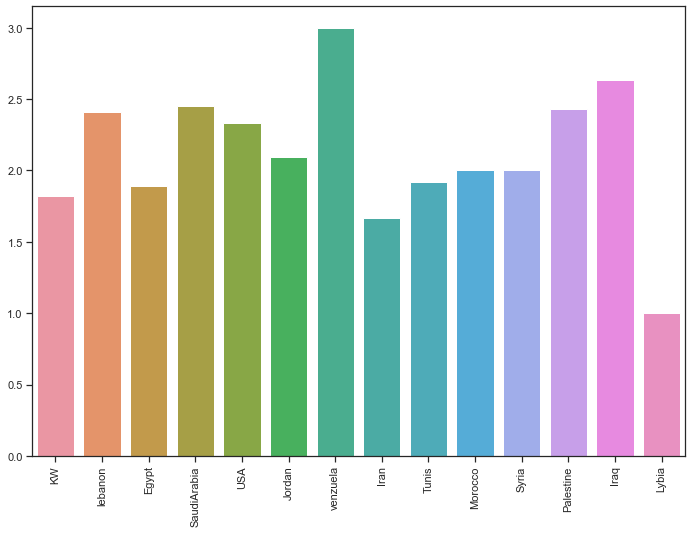

In [104]:
nation = data.NationalITy.unique()
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

Chemistry average: 2.0833333333333335


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Math'),
  Text(2, 0, 'Arabic'),
  Text(3, 0, 'Science'),
  Text(4, 0, 'English'),
  Text(5, 0, 'Quran'),
  Text(6, 0, 'Spanish'),
  Text(7, 0, 'French'),
  Text(8, 0, 'History'),
  Text(9, 0, 'Biology'),
  Text(10, 0, 'Chemistry'),
  Text(11, 0, 'Geology')])

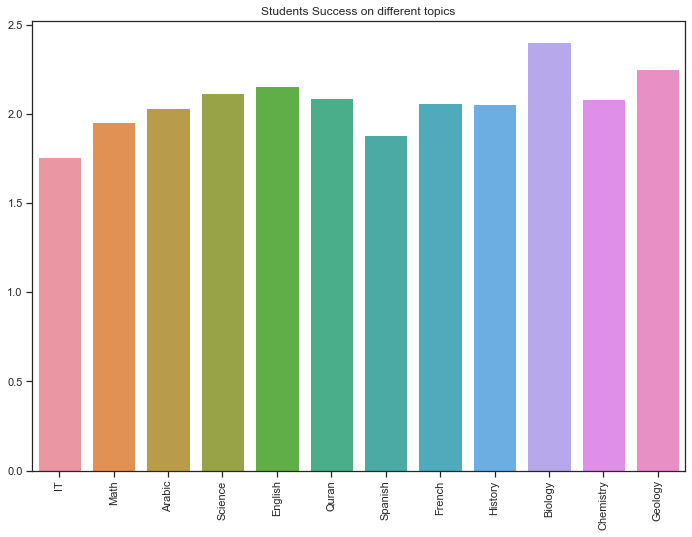

In [105]:
lessons = data.Topic.unique()
lessons_grade_ave=[sum(data[data.Topic == i].numeric_class)/float(len(data[data.Topic == i])) for i in lessons]
ax = sns.barplot(x=lessons, y=lessons_grade_ave)
plt.title('Students Success on different topics')
chemistry_ave = sum(data[data.Topic == 'Chemistry'].numeric_class)/float(len(data[data.Topic == 'Chemistry']))
print('Chemistry average: '+ str(chemistry_ave))
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Parents affects success of students')

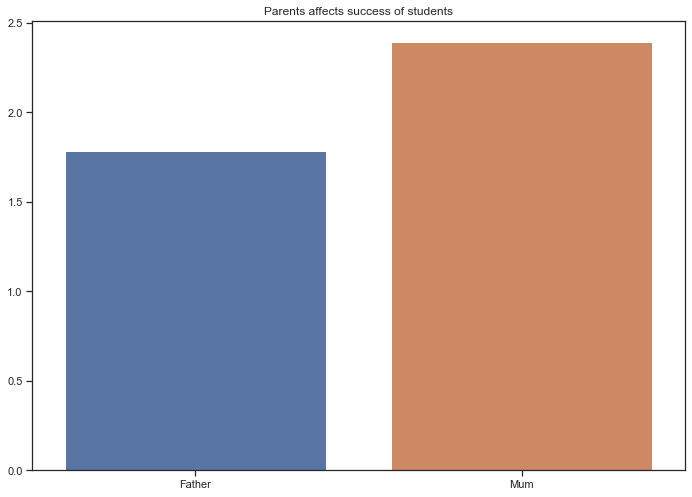

In [106]:
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Parents affects success of students')

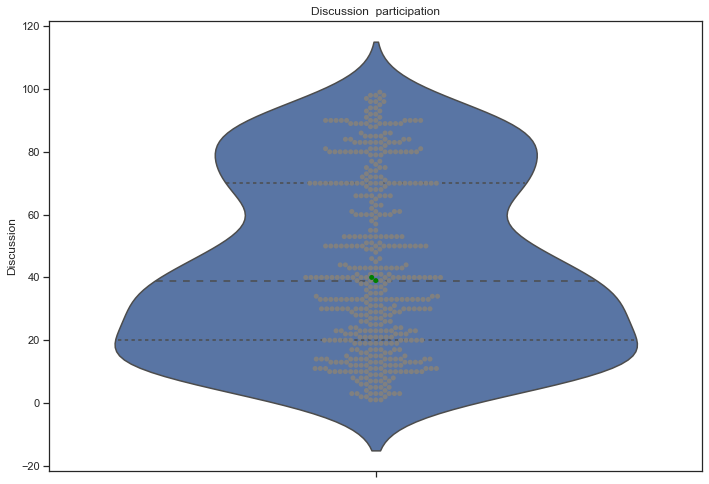

In [107]:
discussion = data.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='gray')
ax = sns.swarmplot(y = unsuccess.Discussion, color='green')
plt.title('Discussion  participation')
plt.savefig('graph.png')

Text(0.5, 1.0, 'Absence effect on success')

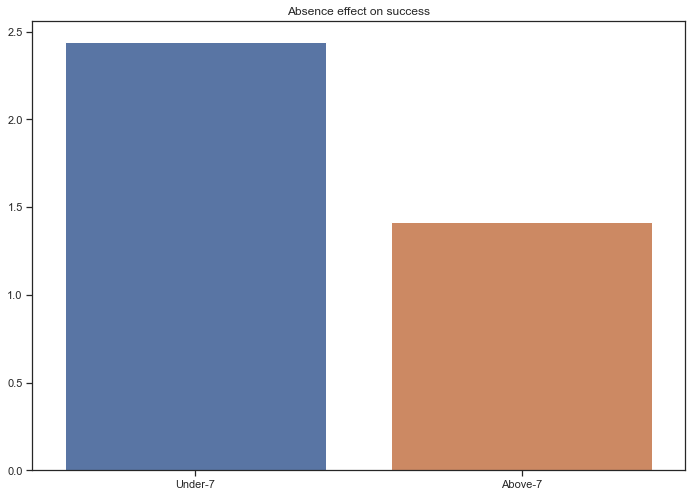

In [108]:
absence_day = data.StudentAbsenceDays.unique()
absense_day_ave = [sum(data[data.StudentAbsenceDays == i].numeric_class)/float(len(data[data.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')

In [109]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

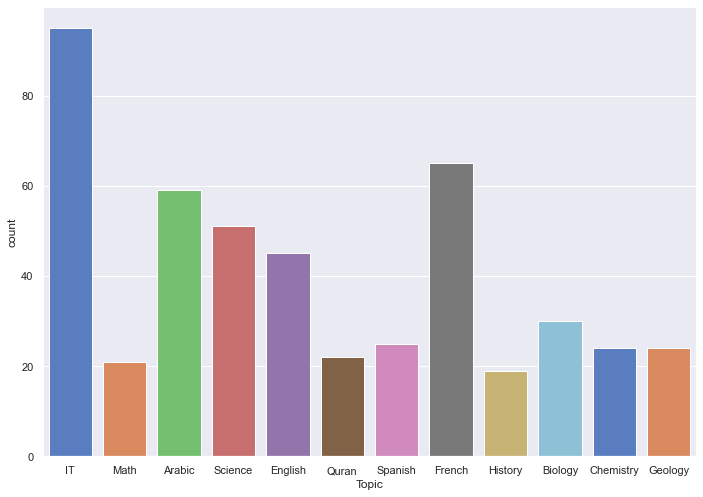

In [110]:
sns.countplot(x="Topic", data=data, palette="muted");
plt.show()

In [111]:
data['Failed'] = np.where(data['Class']=='L',1,0)

In [112]:
pd.crosstab(data['Class'],data['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



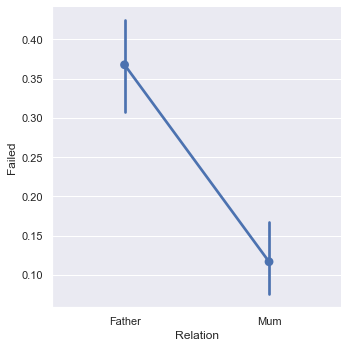

In [113]:
sns.factorplot('Relation','Failed',data= data)

<AxesSubplot:xlabel='None-None-ParentschoolSatisfaction', ylabel='gender-NationalITy-PlaceofBirth'>

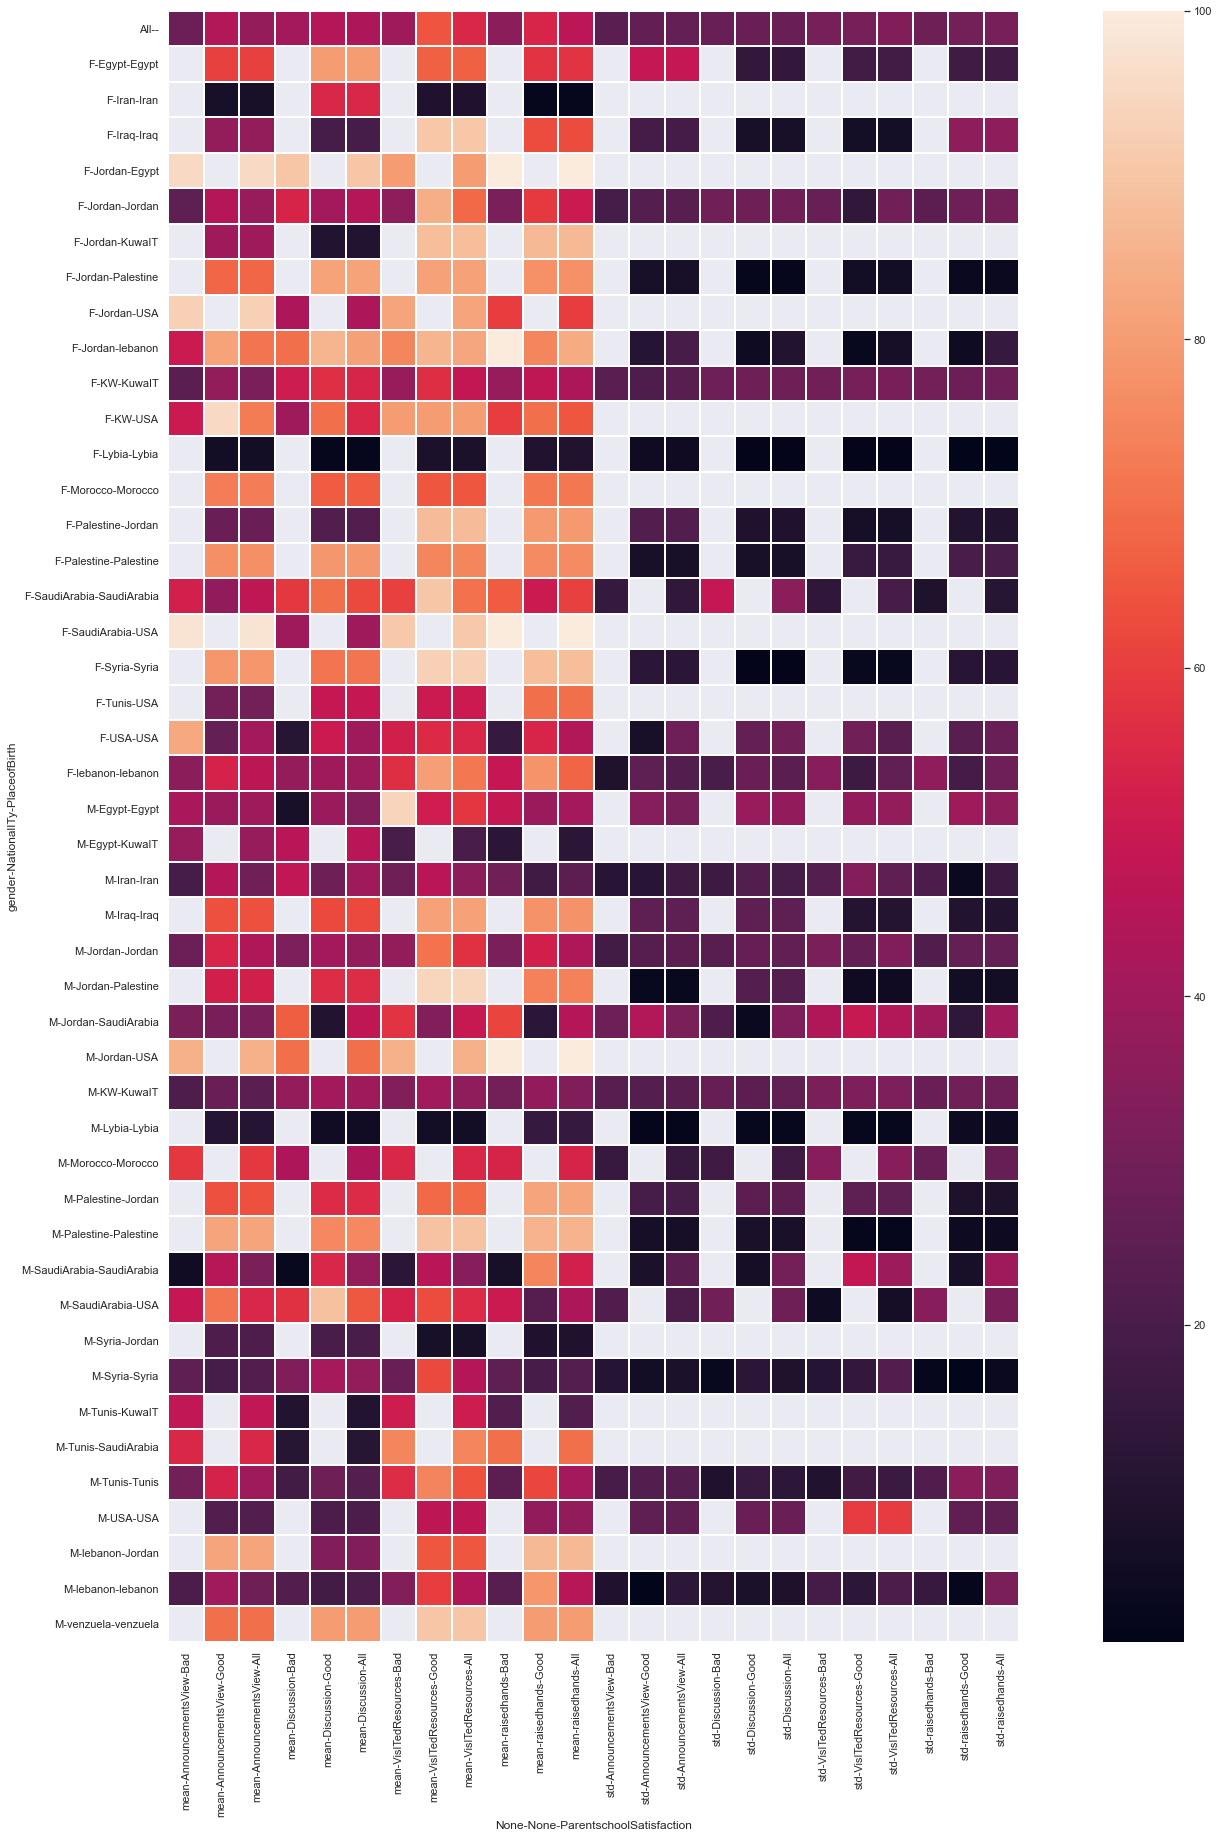

In [114]:
pivot = pd.pivot_table(data,
            values = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
            index = ['gender', 'NationalITy', 'PlaceofBirth'], 
                       columns= ['ParentschoolSatisfaction'],
                       aggfunc=[np.mean, np.std], 
                       margins=True)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (30, 30))
sns.heatmap(pivot,linewidths=0.2,square=True )

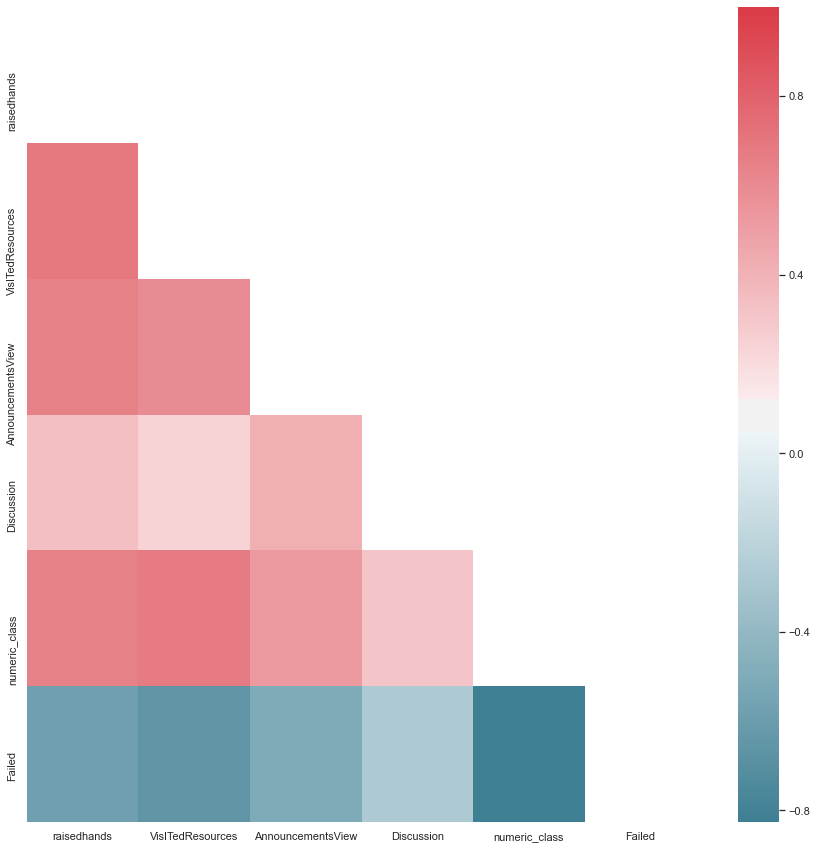

In [115]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(15, 15))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = data.corr()
#variable_correlations
heat_map(variable_correlations)

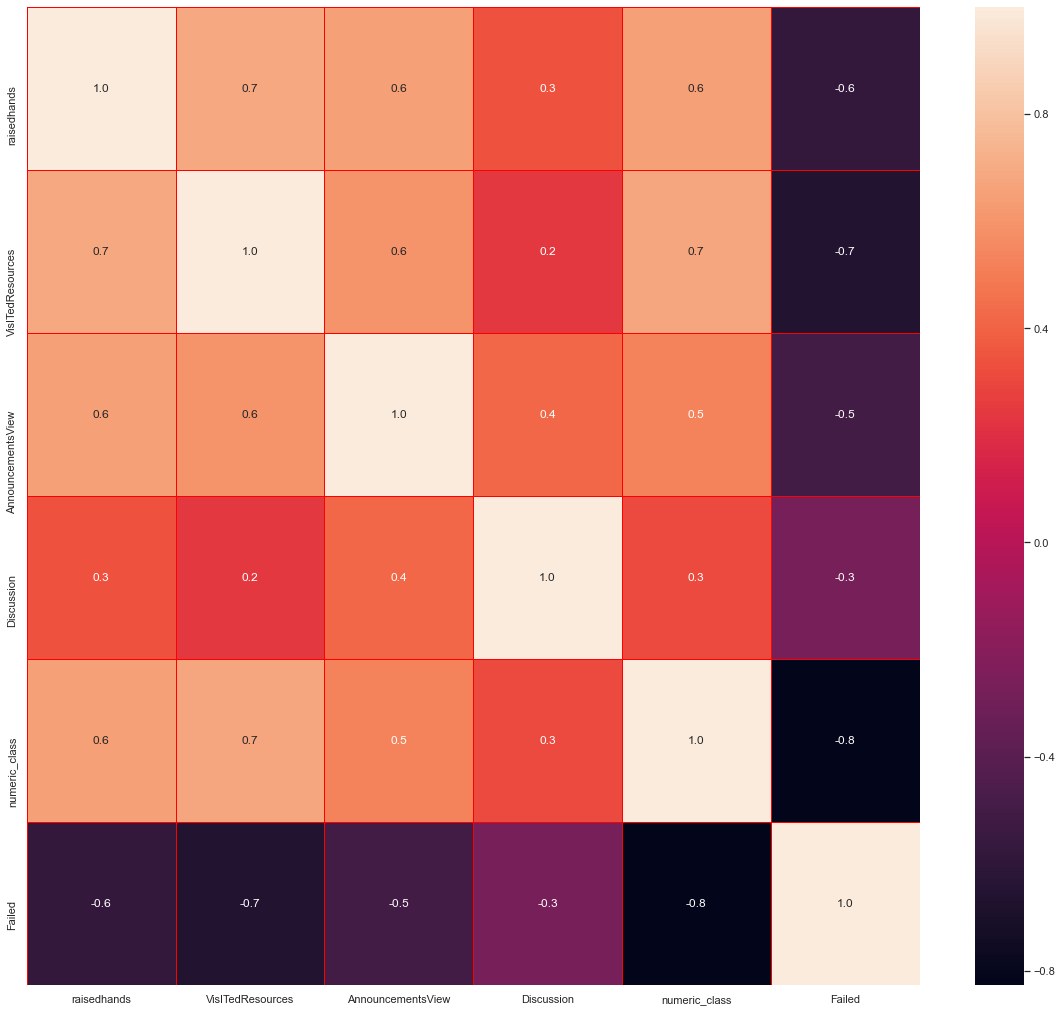

In [116]:
#heatmap
f,ax=plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="red",fmt=".1f",ax=ax)
plt.show()

In [117]:
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = np.arange(0,82),
                    y = data.Discussion,
                    mode = "lines",
                    name = "discussion",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    )
# Creating trace2
trace2 = go.Scatter(
                    x =np.arange(0,82) ,
                    y = data.raisedhands,
                    mode = "lines",
                    name = "raisedhands",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                   )
df = [trace1, trace2]
layout = dict(title = 'Discussion and Raisedhands of Students',
              xaxis= dict(title= 'raisedhands',ticklen= 5,zeroline= False)
             )
fig = dict(data = df, layout = layout)
iplot(fig)

In [118]:
#pip install chart-studio

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encount

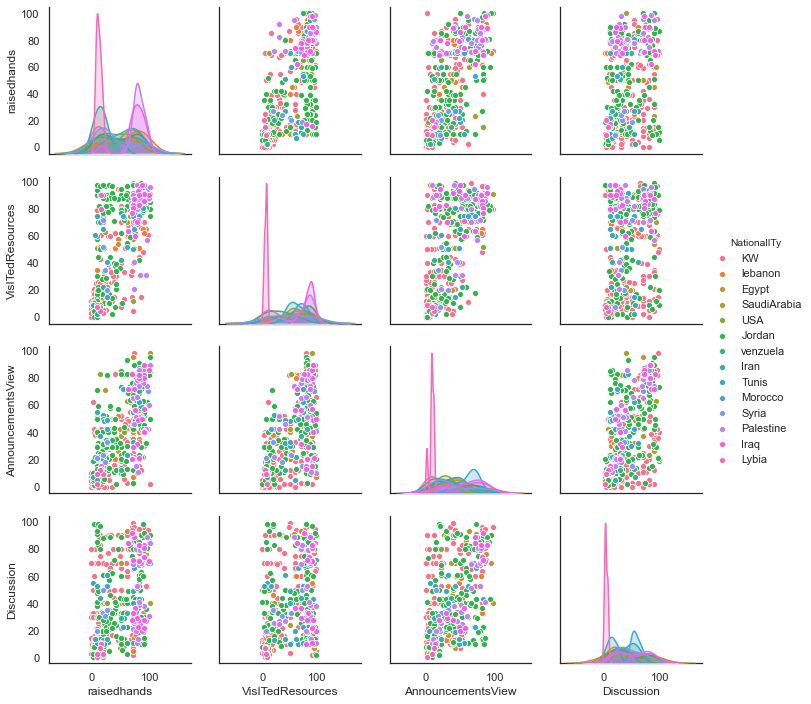

In [119]:
df_small = data[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'NationalITy']]
sns.pairplot(df_small, hue='NationalITy')

In [120]:
data['AbsBoolean'] = data['StudentAbsenceDays']
data['AbsBoolean'] = np.where(data['AbsBoolean'] == 'Under-7',0,1)
data['AbsBoolean'].groupby(data['Topic']).mean()

Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: AbsBoolean, dtype: float64

In [121]:
#The Geology students seemed to participate more frequently than those in other subjects and attended class more than those in any other subject, which could explain why none of the Geology students failed.

In [122]:
data['TotalQ'] = data['Class']
data['TotalQ'].loc[data.TotalQ == 'Low-Level'] = 0.0
data['TotalQ'].loc[data.TotalQ == 'Middle-Level'] = 1.0
data['TotalQ'].loc[data.TotalQ == 'High-Level'] = 2.0

continuous_subset = data.ix[:,9:13]
continuous_subset['gender'] = np.where(data['gender']=='M',1,0)
continuous_subset['Parent'] = np.where(data['Relation']=='Father',1,0)

X = np.array(continuous_subset).astype('float64')
y = np.array(data['TotalQ'])
X.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



(480, 6)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [124]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter =80, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 62


In [125]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.57


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.48      0.56      0.52        39
           L       0.60      1.00      0.75        34
           M       0.63      0.37      0.46        71

    accuracy                           0.57       144
   macro avg       0.57      0.64      0.58       144
weighted avg       0.58      0.57      0.55       144



In [127]:
#Linear SVC
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 52


In [128]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.64


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.54      0.49      0.51        39
           L       0.71      0.85      0.77        34
           M       0.65      0.62      0.63        71

    accuracy                           0.64       144
   macro avg       0.63      0.65      0.64       144
weighted avg       0.63      0.64      0.63       144



In [130]:
#Non-linear SVC with rbf

In [131]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 47


In [132]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



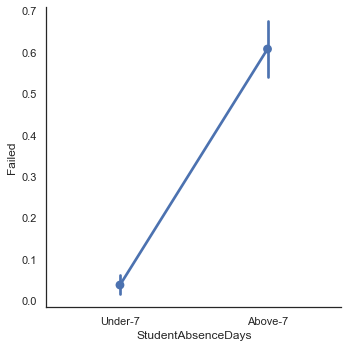

In [133]:
sns.factorplot('StudentAbsenceDays','Failed',data=data)

In [134]:
continuous_subset['Absences'] = data['AbsBoolean']
X = np.array(continuous_subset).astype('float64')
y = np.array(data['TotalQ'])
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [135]:
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 38


In [136]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.74


In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.72      0.46      0.56        39
           L       0.85      0.85      0.85        34
           M       0.69      0.83      0.76        71

    accuracy                           0.74       144
   macro avg       0.76      0.72      0.72       144
weighted avg       0.74      0.74      0.73       144



In [138]:
data.loc[(data['raisedhands']==2) & (data['VisITedResources']==9) & (data['AnnouncementsView']==7)]


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class,Failed,AbsBoolean,TotalQ
126,F,Iran,Iran,lowerlevel,G-02,C,IT,F,Father,2,...,7,55,Yes,Good,Under-7,M,2,0,0,M


In [139]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
#clf = MLPClassifier(solver='lbfgs',alpha=1e-5,random_state=1)

In [140]:
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [141]:
clf = MLPClassifier(solver='lbfgs',alpha=.1,random_state=1)
clf.fit(X,y)
scores=cross_val_score(clf,X,y,cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

In [142]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.09)


In [143]:
df = data.drop(data.index[[126]])
data.shape

(480, 21)

In [144]:
data.loc[(data['raisedhands']==2) & (data['VisITedResources']==9) & (data['AnnouncementsView']==7)]


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class,Failed,AbsBoolean,TotalQ
126,F,Iran,Iran,lowerlevel,G-02,C,IT,F,Father,2,...,7,55,Yes,Good,Under-7,M,2,0,0,M


In [145]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=80, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 54


In [146]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.62


In [147]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
#from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [148]:
numerical = ['raisedhands','AnnouncementsView','Discussion']
x_features = ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','StudentAbsenceDays','Class','ParentschoolSatisfaction','raisedhands','AnnouncementsView','Discussion']
label = "VisITedResources"

In [149]:
def visited_categorizing(x):
    if(x>=75):
        return "A"
    if(x>=30):
        return "B"
    if(x>=0):
        return "C"

In [150]:
data[label]  = data[label].apply(visited_categorizing)

In [151]:
from sklearn import preprocessing
categorical = ['gender',"VisITedResources",'NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','StudentAbsenceDays','Class','ParentschoolSatisfaction']

le = preprocessing.LabelEncoder()
for x in categorical:
    le.fit(data[x])
    data[x] = le.transform(data[x])

In [152]:
X = data[x_features]
y = data[label]

In [153]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

In [154]:
clf = make_pipeline(SelectFromModel(RFC()), RFC())

In [155]:
grid_param = [{
     'randomforestclassifier' : [RFC()],
     'randomforestclassifier__n_estimators' : [2000],

}]

In [156]:
grid_search = GridSearchCV(clf,grid_param,cv=2,verbose = 5 , n_jobs = -1 )


In [157]:
model = grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.0s finished


In [158]:
model.best_estimator_

Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=2000))])

In [159]:
model.score(X_test,y_test)

0.6833333333333333

In [160]:
model.score(X_train,y_train)

1.0

In [161]:
import pickle
filename = 'H4_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [162]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [163]:
print(result)

0.6833333333333333


In [164]:
data.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class,Failed,AbsBoolean
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,4.345833,4.397917,1.345833,2.906250,0.472917,5.256250,0.489583,0.410417,46.775000,0.879167,37.918750,43.283333,0.562500,0.608333,0.602083,1.143750,2.031250,0.264583,0.397917
std,0.481815,2.469265,2.628334,0.603732,2.464267,0.612411,3.388388,0.500413,0.492423,30.779223,0.858449,26.611244,27.637735,0.496596,0.488632,0.489979,0.846312,0.748738,0.441571,0.489979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,15.750000,0.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,5.000000,0.000000,0.000000,50.000000,1.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,4.000000,4.000000,2.000000,5.000000,1.000000,7.000000,1.000000,1.000000,75.000000,2.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
max,1.000000,13.000000,13.000000,2.000000,9.000000,2.000000,11.000000,1.000000,1.000000,100.000000,2.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000


In [165]:
from sklearn.naive_bayes import GaussianNB

In [166]:
nb=GaussianNB()

In [167]:
nb.fit(X_train,y_train)

GaussianNB()

In [168]:
print("Accuracy of naive bayees algorithm (GaussianNB): ",nb.score(X_test,y_test))

Accuracy of naive bayees algorithm (GaussianNB):  0.6583333333333333


In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
dt=DecisionTreeClassifier()

In [171]:
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [177]:
print("Accuracy score for Decision Tree Classification (DecisionTreeClassifier): " ,dt.score(X_test,y_test))



Accuracy score for Decision Tree Classification (DecisionTreeClassifier):  0.65


In [173]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)

print("random forest algorithm accuracy: ",rf.score(X_test,y_test))

random forest algorithm accuracy:  0.7166666666666667


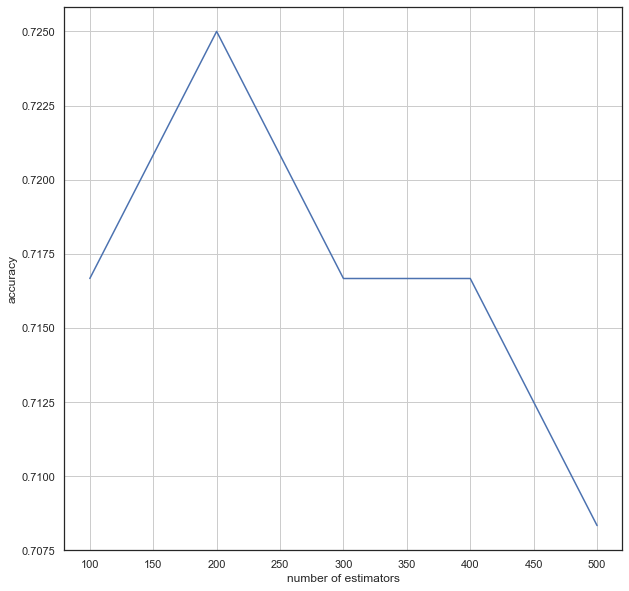

Maximum value of accuracy is 0.725 
when n_estimators= 200.


In [174]:
score_list1=[]
for i in range(100,501,100):
    rf2=RandomForestClassifier(n_estimators=i,random_state=1)
    rf2.fit(X_train,y_train)
    score_list1.append(rf2.score(X_test,y_test))
plt.figure(figsize=(10,10))
plt.plot(range(100,501,100),score_list1)
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print("Maximum value of accuracy is {} \nwhen n_estimators= {}.".format(max(score_list1),(1+score_list1.index(max(score_list1)))*100))

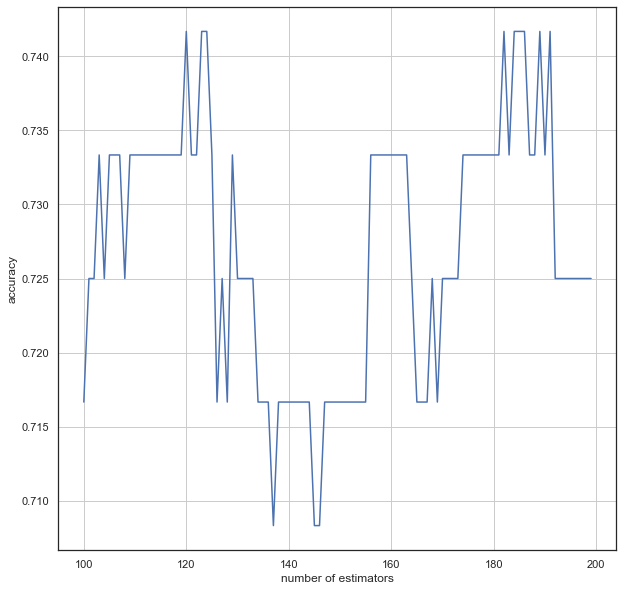

Maximum value of accuracy is 0.7416666666666667 when number of estimators between 100 and 200 


In [175]:
score_list2=[]
for i in range(100,200):
    rf3=RandomForestClassifier(n_estimators=i,random_state=1)
    rf3.fit(X_train,y_train)
    score_list2.append(rf3.score(X_test,y_test))
plt.figure(figsize=(10,10))
plt.plot(range(100,200),score_list2)
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.grid()
plt.show()

print("Maximum value of accuracy is {} when number of estimators between 100 and 200 ".format(max(score_list2)))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77        46
           1       0.69      0.26      0.38        34
           2       0.76      0.93      0.83        40

    accuracy                           0.72       120
   macro avg       0.71      0.69      0.66       120
weighted avg       0.71      0.72      0.68       120



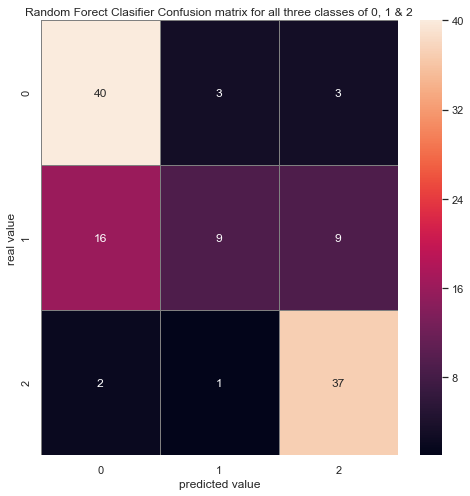

In [176]:
y_pred=rf.predict(X_test)
y_true=y_test

#cm
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
print(classification_report(y_true,y_pred))
#cm visualization
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="gray",fmt=".0f",ax=ax)
plt.xlabel("predicted value")
plt.ylabel("real value")
plt.title("Random Forect Clasifier Confusion Matrix for all three classes of 0, 1 & 2")
plt.show()